In [2]:
import pandas as pd

df = pd.read_csv('D:/Projects/Human-Behavior-Drift-Detection-System/data/processed/behavior_vectors.csv')
df.head()

,Event_ID,Avg_Congestion,High_Risk_Pct,Network_Stress,Path_Pref_Corridor,Path_Pref_Ramp,Path_Pref_Stairs
0,201,0.614915,24.576271,72.623211,29.661017,34.745763,35.593220
1,202,0.665169,33.898305,78.513276,33.050847,32.203390,34.745763
2,203,0.644153,27.118644,75.943769,35.593220,29.661017,34.745763
3,204,0.646807,29.411765,76.971164,33.613445,32.773109,33.613445
4,205,0.652941,26.890756,77.641544,29.411765,30.252101,40.336134


In [3]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns='Event_ID')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.15, random_state=42)
model.fit(X_scaled)

df["behavior_score"] = model.decision_function(X_scaled)
df["risk_score"] = -df["behavior_score"]


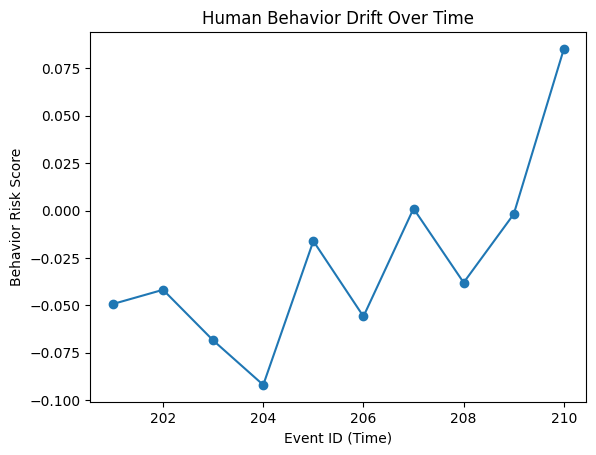

In [5]:
import matplotlib.pyplot as plt

plt.plot(df["Event_ID"], df["risk_score"], marker="o")
plt.xlabel("Event ID (Time)")
plt.ylabel("Behavior Risk Score")
plt.title("Human Behavior Drift Over Time")
plt.show()


In [8]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_scaled.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(X_scaled.shape[1])
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_scaled, X_scaled, epochs=50, batch_size=4, verbose=0)

recon = model.predict(X_scaled)
recon_error = ((X_scaled - recon)**2).mean(axis=1)

df["risk_score"] = recon_error


ModuleNotFoundError: No module named 'tensorflow'